<a href="https://colab.research.google.com/github/dhcryan/kaggle_challenge_/blob/main/week7/problem_minsik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import os 
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("funda_train.csv")

In [ ]:
submission = pd.read_csv('submission.csv')

In [ ]:
submission.shape

(1967, 2)

In [ ]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0.0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0.0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0.0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0.0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0.0,NaN,기타 미용업,2000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234860 entries, 0 to 234859
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   store_id          234860 non-null  int64  
 1   card_id           234860 non-null  int64  
 2   card_company      234859 non-null  object 
 3   transacted_date   234859 non-null  object 
 4   transacted_time   234859 non-null  object 
 5   installment_term  234859 non-null  float64
 6   region            178007 non-null  object 
 7   type_of_business  84792 non-null   object 
 8   amount            234859 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 16.1+ MB


In [ ]:
train[train['amount']<0]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10,17:26,2.0,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04,17:52,0.0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17,10:32,0.0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03,15:36,0.0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28,13:21,0.0,NaN,기타 미용업,-57.142857
...,...,...,...,...,...,...,...,...,...
234209,66,172507,a,2016-08-17,22:01,0.0,경북 경주시,한식 음식점업,-11142.857143
234510,66,172698,a,2016-09-26,19:24,0.0,경북 경주시,한식 음식점업,-14285.714286
234698,66,172820,a,2016-10-17,19:12,0.0,경북 경주시,한식 음식점업,-5642.857143
234777,66,172867,c,2016-10-27,20:03,0.0,경북 경주시,한식 음식점업,-4142.857143


In [ ]:
import rpy2
rpy2.__version__

'3.3.6'

In [ ]:
import numpy as np
np.__version__

'1.19.5'

In [ ]:
pip install pmdarima==1.5.3

  Using cached pmdarima-1.5.3-cp38-cp38-manylinux1_x86_64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pmdarima

In [ ]:
import statsmodels
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

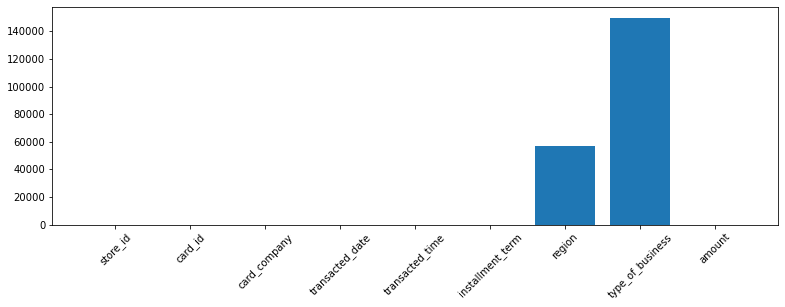

In [ ]:
plt.figure(figsize=(13,4))
plt.bar(train.columns, train.isnull().sum())
plt.xticks(rotation=45)

In [ ]:
train =  train.drop(['region','type_of_business'],axis = 1)
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
0,0,0,b,2016-06-01,13:13,0.0,1857.142857
1,0,1,h,2016-06-01,18:12,0.0,857.142857
2,0,2,c,2016-06-01,18:52,0.0,2000.000000
3,0,3,a,2016-06-01,20:22,0.0,7857.142857
4,0,4,c,2016-06-02,11:06,0.0,2000.000000


<AxesSubplot:xlabel='amount'>

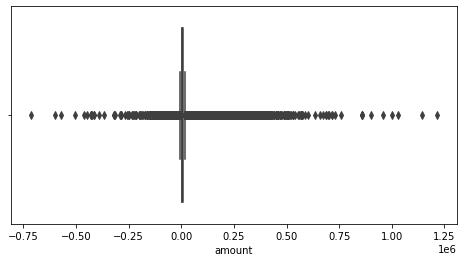

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(train['amount'])

In [ ]:
train[train['amount']<0].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
41,0,40,a,2016-06-10,17:26,2.0,-8571.428571
347,0,285,a,2016-08-04,17:52,0.0,-1857.142857
731,0,473,g,2016-10-17,10:32,0.0,-2000.000000
831,0,230,b,2016-11-03,15:36,0.0,-85.714286
944,0,138,a,2016-11-28,13:21,0.0,-57.142857


In [ ]:
train['datetime'] = pd.to_datetime(train.transacted_date+' '+train.transacted_time, format = '%Y-%m-%d %H:%M:%S')
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount,datetime
0,0,0,b,2016-06-01,13:13,0.0,1857.142857,2016-06-01 13:13:00
1,0,1,h,2016-06-01,18:12,0.0,857.142857,2016-06-01 18:12:00
2,0,2,c,2016-06-01,18:52,0.0,2000.000000,2016-06-01 18:52:00
3,0,3,a,2016-06-01,20:22,0.0,7857.142857,2016-06-01 20:22:00
4,0,4,c,2016-06-02,11:06,0.0,2000.000000,2016-06-02 11:06:00


In [ ]:
def remove_refund(df):
    refund = df[df['amount']<0] # 매출 음숫값
    non_refund = df[df['amount']>0] # 매출 양숫값
    removed_data = pd.DataFrame()
    
    for i in tqdm(df.store_id.unique()):
        divided_data = non_refund[non_refund['store_id']==i]  # 매출 양숫값 상점별 분류
        divided_data2 = refund[refund['store_id']==i] # 매출 음숫값 상점별 분류
        
        for neg in divided_data2.to_records()[:]:
            refund_store = neg['store_id']
            refund_id = neg['card_id'] # 환불 카드 아이디 추출
            refund_datetime = neg['datetime'] # 환불 시간 추출
            refund_amount = abs(neg['amount']) # 매출 음숫값의 절댓값
            
            refund_pay_list = divided_data[divided_data['datetime']<= refund_datetime]
            refund_pay_list = refund_pay_list[refund_pay_list['card_id'] == refund_id]
            refund_pay_list = refund_pay_list[refund_pay_list['amount'] == refund_amount]
            
            if len(refund_pay_list) != 0:
                refund_datetime = max(refund_pay_list['datetime'])
                noise_list = divided_data[divided_data['datetime']==refund_datetime]
                noise_list = noise_list[noise_list['card_id']==refund_id]
                noise_list = noise_list[noise_list['amount']==refund_amount]
                divided_data = divided_data.drop(index=noise_list.index)
        removed_data = pd.concat([removed_data,divided_data], axis = 0)
    return removed_data
        

100%|██████████| 60/60 [00:07<00:00,  8.17it/s]


<AxesSubplot:xlabel='amount'>

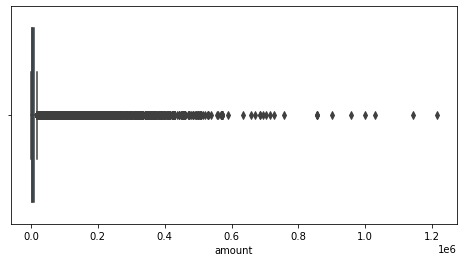

In [ ]:
positive_data = remove_refund(train)
plt.figure(figsize=(8,4))
sns.boxplot(positive_data['amount'])

In [ ]:
positive_data.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount,datetime
0,0,0,b,2016-06-01,13:13,0.0,1857.142857,2016-06-01 13:13:00
1,0,1,h,2016-06-01,18:12,0.0,857.142857,2016-06-01 18:12:00
2,0,2,c,2016-06-01,18:52,0.0,2000.000000,2016-06-01 18:52:00
3,0,3,a,2016-06-01,20:22,0.0,7857.142857,2016-06-01 20:22:00
4,0,4,c,2016-06-02,11:06,0.0,2000.000000,2016-06-02 11:06:00


In [ ]:
def month_resampling(df):
    new_data = pd.DataFrame()
    df['year_month'] = df['transacted_date'].str.slice(stop=7)
    year_month = df['year_month'].drop_duplicates()
    
    downsampling_data = df.groupby(['store_id','year_month']).amount.sum()
    downsampling_data = pd.DataFrame(downsampling_data)
    downsampling_data = downsampling_data.reset_index(drop=False, inplace = False)
    
    for i in tqdm(df.store_id.unique()):
        store = downsampling_data[downsampling_data['store_id']==i]
        start_time = min(store['year_month'])
        store = store.merge(year_month, how = 'outer')
        store = store.sort_values(by=['year_month'],axis = 0, ascending = True)
        store['amount'] = store['amount'].fillna(2) # 0으로 하지 않은 이유는 로그 정규화를 진행해야 하기 때문
                                                    # 1이하의 값은 로그 정규화 과정에서 음수 또는 무한대가 나옴
        store['store_id'] = store['store_id'].fillna(i)
        store = store[store['year_month']>=start_time]
        
        new_data = pd.concat([new_data,store],axis = 0)
    return new_data

In [ ]:
resampling_data = month_resampling(positive_data)
resampling_data['store_id'] = resampling_data['store_id'].astype(int)
resampling_data
# 시간 데이터를 너무 크게 다운샘플링 해버리면 정확도가 너무 떨어진다

100%|██████████| 60/60 [00:00<00:00, 261.28it/s]


,store_id,year_month,amount
0,0,2016-06,7.470000e+05
1,0,2016-07,1.005000e+06
2,0,2016-08,8.697143e+05
3,0,2016-09,8.978571e+05
4,0,2016-10,8.354286e+05
...,...,...,...
28,66,2018-10,2.000000e+00
29,66,2018-11,2.000000e+00
30,66,2018-12,2.000000e+00
31,66,2019-01,2.000000e+00


In [ ]:
def time_series(df, i):
    store = df[df['store_id']==i]
    index = pd.date_range(min(store['year_month']),'2019-03',freq='BM')
    ts = pd.Series(store['amount'].values,index = index)
    return ts

In [ ]:
store_0 = time_series(resampling_data,0)
store_0

2016-06-30    7.470000e+05
2016-07-29    1.005000e+06
2016-08-31    8.697143e+05
2016-09-30    8.978571e+05
2016-10-31    8.354286e+05
2016-11-30    6.970000e+05
2016-12-30    7.618571e+05
2017-01-31    5.856429e+05
2017-02-28    7.940000e+05
2017-03-31    7.202571e+05
2017-04-28    6.852857e+05
2017-05-31    7.444286e+05
2017-06-30    6.820000e+05
2017-07-31    7.282857e+05
2017-08-31    7.490000e+05
2017-09-29    8.408571e+05
2017-10-31    6.005714e+05
2017-11-30    6.308571e+05
2017-12-29    8.127143e+05
2018-01-31    6.431429e+05
2018-02-28    6.852857e+05
2018-03-30    8.484286e+05
2018-04-30    6.361429e+05
2018-05-31    6.864286e+05
2018-06-29    7.072857e+05
2018-07-31    7.587143e+05
2018-08-31    6.798571e+05
2018-09-28    6.518571e+05
2018-10-31    7.390000e+05
2018-11-30    6.760000e+05
2018-12-31    8.745714e+05
2019-01-31    6.828571e+05
2019-02-28    5.152857e+05
Freq: BM, dtype: float64

<AxesSubplot:>

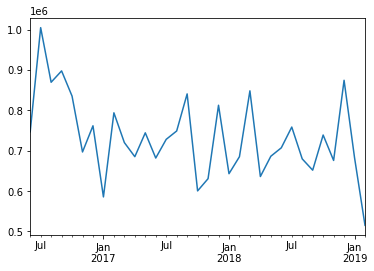

In [ ]:
store_0.plot()